# **DL: ANN logistic regression**

dong gyun ko <br/>
last updated: march 4, 2022

In [1]:
# import library

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

## **1. example (1)**

### **1.1. generate training data (1)**

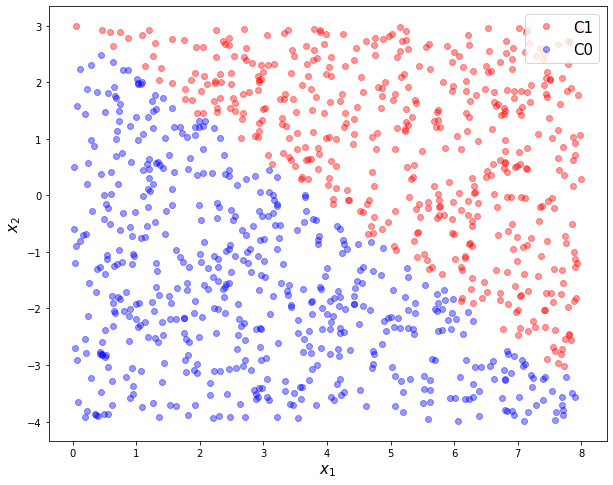

In [2]:
# generate training data (1)

m = 1000

x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + x2 - 3

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

train_X = np.asmatrix(train_X)
train_y = np.asmatrix(train_y)

plt.figure(figsize = (10, 8))

plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)

plt.show()

### **1.2. ANN logistic regression(1)**

In [3]:
LogisticRegression = tf.keras.models.Sequential([tf.keras.layers.Dense(input_dim = 2, units = 1, activation = 'sigmoid')])

In [4]:
LogisticRegression.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'binary_crossentropy')

In [5]:
loss = LogisticRegression.fit(train_X, train_y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 0s 707us/step - loss: 0.7101
Epoch 2/10
32/32 [==============================] - 0s 836us/step - loss: 0.3017
Epoch 3/10
32/32 [==============================] - 0s 875us/step - loss: 0.2142
Epoch 4/10
32/32 [==============================] - 0s 773us/step - loss: 0.1794
Epoch 5/10
32/32 [==============================] - 0s 804us/step - loss: 0.1565
Epoch 6/10
32/32 [==============================] - 0s 933us/step - loss: 0.1409
Epoch 7/10
32/32 [==============================] - 0s 772us/step - loss: 0.1282
Epoch 8/10
32/32 [==============================] - 0s 804us/step - loss: 0.1213
Epoch 9/10
32/32 [==============================] - 0s 901us/step - loss: 0.1146
Epoch 10/10
32/32 [==============================] - 0s 965us/step - loss: 0.1048


In [6]:
w = LogisticRegression.layers[0].get_weights()[0]
b = LogisticRegression.layers[0].get_weights()[1]

print(w)
print(b)

[[1.8407545]
 [2.4740684]]
[-6.6978006]


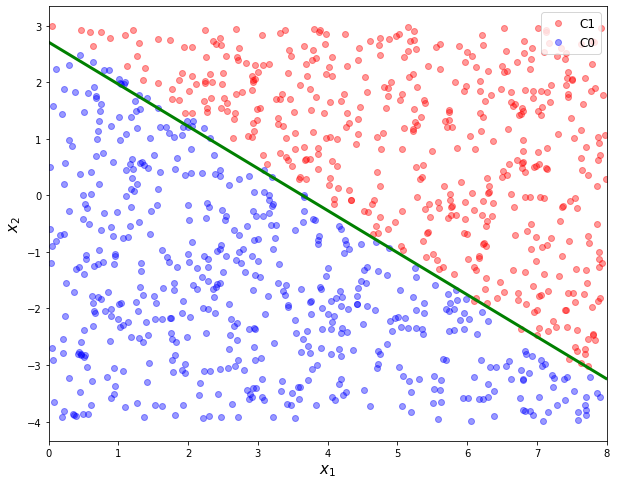

In [7]:
x1p = np.arange(0, 8, 0.01).reshape(-1, 1)
x2p = - w[0,0]/w[1,0]*x1p - b[0]/w[1,0]

plt.figure(figsize = (10, 8))

plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'g', linewidth = 3, label = '')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)

plt.show()

## **2. example (2)**

### **2.1. generate training data (2)**

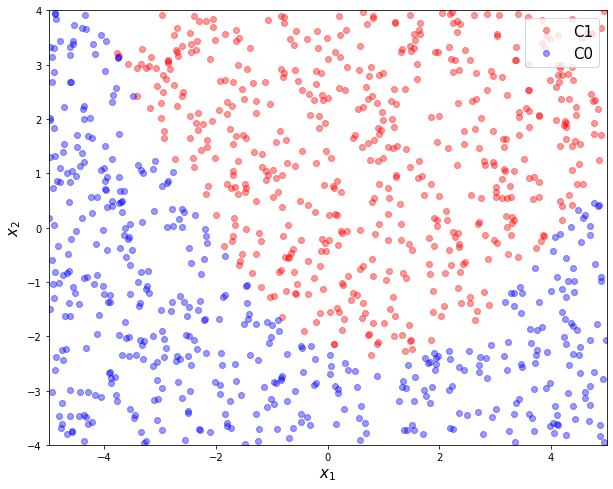

In [8]:
# generate training data (2)

m = 1000

x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.asmatrix(train_X)

train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

plt.figure(figsize = (10, 8))

plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.xlim([-5, 5])
plt.ylim([-4, 4])

plt.show()

### **2.2. ANN logistic regression(2)**

In [9]:
LogisticRegression = tf.keras.models.Sequential([tf.keras.layers.Dense(input_dim = 2, units = 2, activation = 'sigmoid'),
                                                 tf.keras.layers.Dense(units = 1, activation = 'sigmoid')])

In [10]:
LogisticRegression.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'binary_crossentropy')

In [11]:
loss = LogisticRegression.fit(train_X, train_y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6372
Epoch 2/10
32/32 [==============================] - 0s 804us/step - loss: 0.4546
Epoch 3/10
32/32 [==============================] - 0s 933us/step - loss: 0.3726
Epoch 4/10
32/32 [==============================] - 0s 740us/step - loss: 0.3005
Epoch 5/10
32/32 [==============================] - 0s 933us/step - loss: 0.2341
Epoch 6/10
32/32 [==============================] - 0s 827us/step - loss: 0.1770
Epoch 7/10
32/32 [==============================] - 0s 708us/step - loss: 0.1454
Epoch 8/10
32/32 [==============================] - 0s 836us/step - loss: 0.1289
Epoch 9/10
32/32 [==============================] - 0s 836us/step - loss: 0.1139
Epoch 10/10
32/32 [==============================] - 0s 767us/step - loss: 0.1088


In [12]:
w1 = LogisticRegression.layers[0].get_weights()[0]
b1 = LogisticRegression.layers[0].get_weights()[1]

w2 = LogisticRegression.layers[1].get_weights()[0]
b2 = LogisticRegression.layers[1].get_weights()[1]

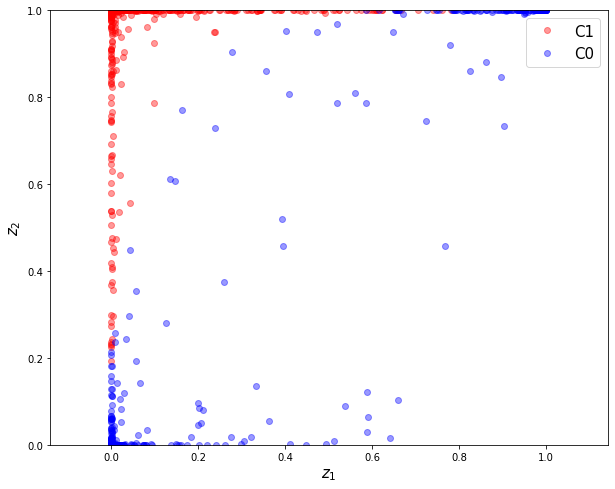

In [13]:
H = train_X*w1 + b1
H = 1/(1 + np.exp(-H))

plt.figure(figsize = (10, 8))

plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

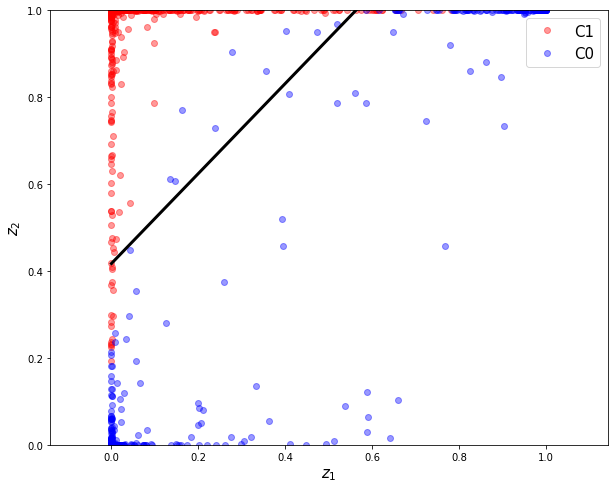

In [14]:
x1p = np.arange(0, 1, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[1,0]*x1p - b2[0]/w2[1,0]

plt.figure(figsize = (10, 8))

plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('$z_1$', fontsize = 15)
plt.ylabel('$z_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

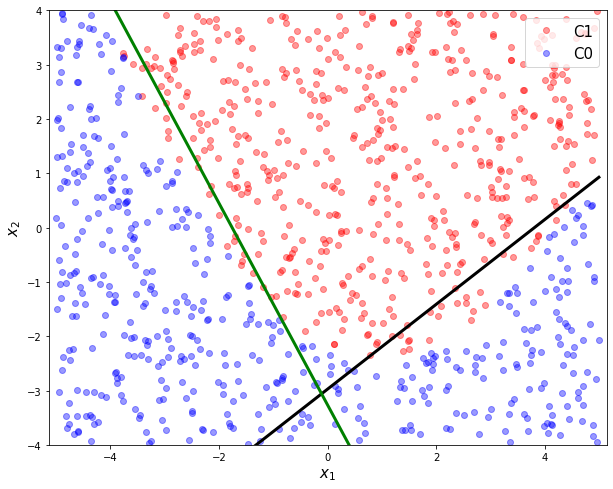

In [15]:
x1p = np.arange(-5, 5, 0.01).reshape(-1, 1)
x2p = - w1[0,0]/w1[1,0]*x1p - b1[0]/w1[1,0]
x3p = - w1[0,1]/w1[1,1]*x1p - b1[1]/w1[1,1]

plt.figure(figsize = (10, 8))

plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'g', linewidth = 3, label = '')
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([-5, 5])
plt.ylim([-4, 4])

plt.show()

## **3. references**

* https://i-systems.github.io/teaching/DL/iNotes_tf2/05_ANN_01_tf2.html